# Titanic Disaster - Model

"RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. " - www.history.com

The purpose of this exercise is to predict whether a person survived the sinking of the ship/not? And what factors had more impact on people not surviving the sinking of the titanic.

# lmport Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import re

# Load The Data

In [2]:
train_data = pd.read_csv("C:\\Users\\Banele Mahlasela\\Downloads\\titanic\\train.csv")
test_data= pd.read_csv("C:\\Users\\Banele Mahlasela\\Downloads\\titanic\\test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore The Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Set PassengerId as an Index Column

In [4]:
train_data.set_index('PassengerId',inplace = True)

In [5]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
train_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Number of males and females in titanic?

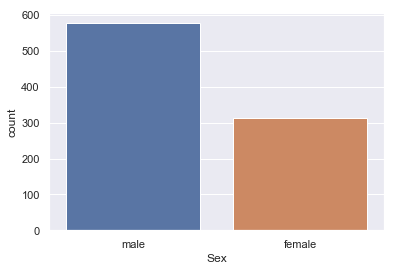

In [8]:
sns.countplot('Sex',data = train_data)

How many males and females were in each class?

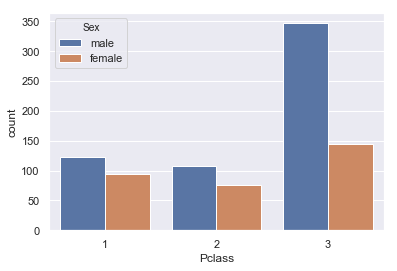

In [9]:
sns.countplot('Pclass',data = train_data, hue = 'Sex')

Finding out whether a person was a child, man or woman.

In [10]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 17:
        return 'Child'
    else:
        return sex

In [11]:
train_data['Person'] = train_data[['Age','Sex']].apply(male_female_child, axis = 1)

In [12]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


How many males, females and children were aboard?

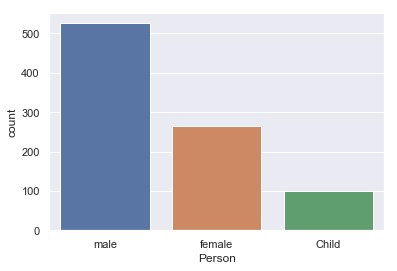

In [13]:
sns.countplot('Person', data = train_data)

How many males, females and Children were aboard?

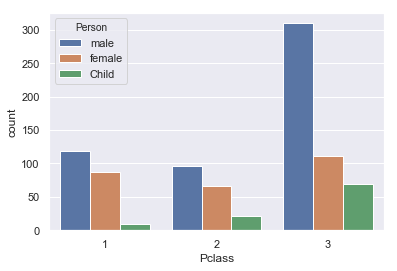

In [14]:
sns.countplot('Pclass', data = train_data, hue = 'Person')

People were aboard by age group?

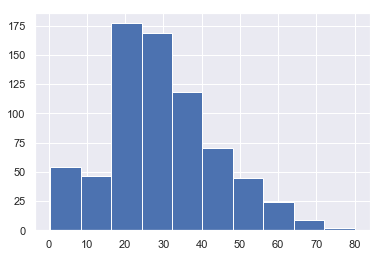

In [15]:
train_data['Age'].hist(bins = 10)

Age Average 

In [16]:
train_data.Age.mean()

29.69911764705882

Age distribution by Gender

C:\Users\Banele Mahlasela\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


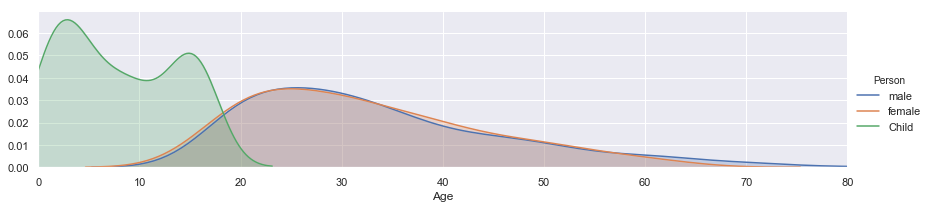

In [17]:
fig = sns.FacetGrid(train_data, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = train_data.Age.max()
fig.set(xlim = (0, oldest))
fig.add_legend()

In [18]:
train_data.Cabin.isna().sum()

687

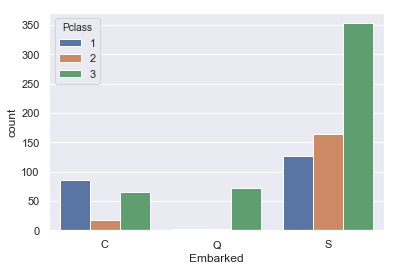

In [19]:
sns.countplot('Embarked', data = train_data, hue = 'Pclass', order = ['C', 'Q', 'S'])

Find Pesron with Family or alone

In [20]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] 

In [21]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2


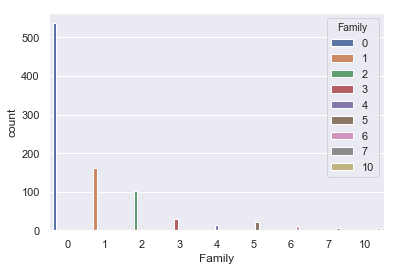

In [22]:
sns.countplot('Family', data = train_data, hue = 'Family')

### Rate of Survival

Getting the values that have effect in the rate of survival

How many people survived and how many died?

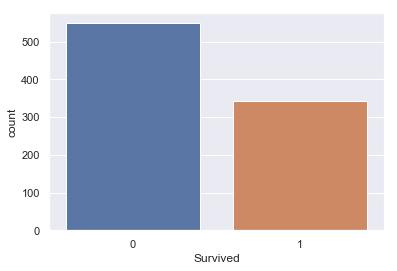

In [23]:
sns.countplot('Survived', data = train_data)

Chances of survival by number of Family members 

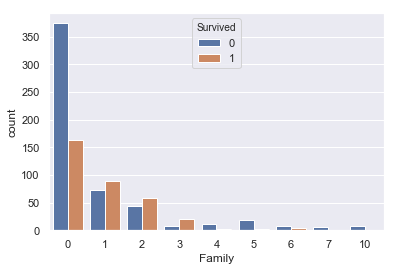

In [24]:
sns.countplot('Family', data = train_data, hue = 'Survived')

Chances of survival by Gender

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Died:
 male      468
female     81
Name: Sex, dtype: int64


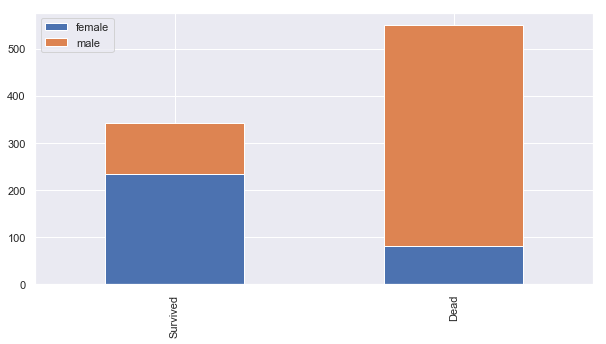

In [25]:
def graph(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    dataset = pd.DataFrame([survived,dead])
    dataset.index = ['Survived','Dead']
    dataset.plot(kind='bar',stacked=True, figsize=(10,5))
    

print("Survived :\n",train_data[train_data['Survived']==1]['Sex'].value_counts())
print("Died:\n",train_data[train_data['Survived']==0]['Sex'].value_counts())
graph('Sex')

Chances of Survival by Class

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


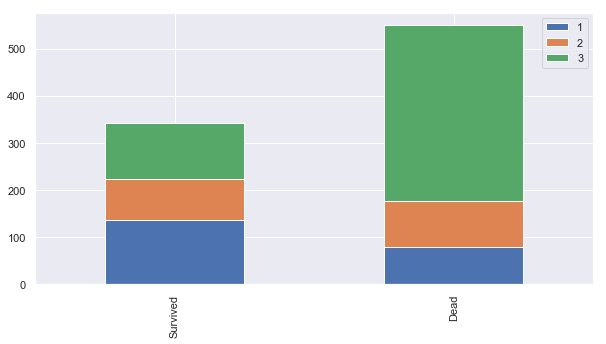

In [26]:
graph('Pclass')
print("Survived :\n",train_data[train_data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Pclass'].value_counts())

Chances of survival by certain age group

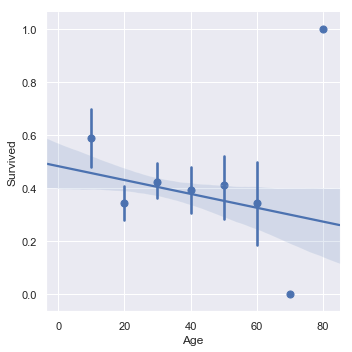

In [27]:
sns.lmplot('Age','Survived', data = train_data, x_bins = [10, 20, 30, 40, 50, 60, 70, 80])

did having a certain Age in the class increase, chances of survival or not?

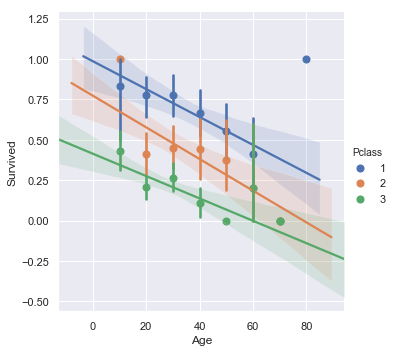

In [28]:
sns.lmplot('Age','Survived', data = train_data, hue = 'Pclass', x_bins = [10, 20, 30, 40, 50, 60, 70, 80])


Did being a male, female, or child and have a family increase your survival chances?

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 137.5+ KB


To study correlation between the features

# Feature Engineering

We want to create features from the existing features and use them in our modelling instead.

Extract the title from the Name of a passenger to see whether that will have an impact on someone's survival chances

In [30]:
def create_title(name):
    m = re.search(" [A-Za-z]+\.", name)
    if m:
        status = re.sub('\.', '', re.sub(" ", "", m.group(0)))
        return status
    else:
        return "None"

In [31]:
train_data['Status'] = train_data['Name'].apply(create_title)

We want to assign the missing ages with the mean age in the ticket class.

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return round(train_data['Age'][(train_data["Pclass"]==1)].mean())

        elif Pclass == 2:
            return round(train_data['Age'][(train_data["Pclass"]==2)].mean())

        else:
            return round(train_data['Age'][(train_data["Pclass"]==2)].mean())

    else:
        return Age

In [33]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

How many passengers have a certain title?

In [34]:
train_data.Status.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Ms            1
Sir           1
Jonkheer      1
Don           1
Lady          1
Mme           1
Name: Status, dtype: int64

We want to group the titles who have are very rare to appear into as 'Other'

In [35]:
title_mapping  = ['Master', 'Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Ms', 'Lady', 'Capt', 'Countess', 'Mme', 'Sir', 'Jonkheer', 'Don']

In [36]:
for title in train_data.Status:
    if title in title_mapping :
        train_data.Status = train_data.Status.replace(title, 'Other')
        

Did having a certain title affect the chances of survival?

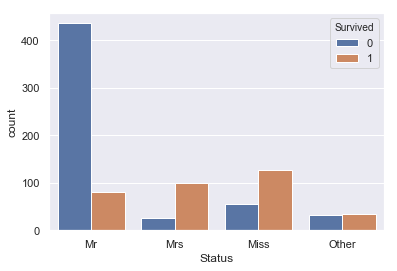

In [37]:
sns.countplot('Status', data = train_data,hue = 'Survived')

Remove features with lot of missing data

In [38]:
train_data.drop(['Name','SibSp', 'Parch','Ticket','Cabin', 'Sex'],axis = 1, inplace = True)

In [39]:
train_data.head()

,Survived,Pclass,Age,Fare,Embarked,Person,Family,Status
PassengerId,,,,,,,,
1,0,3,22.0,7.2500,S,male,1,Mr
2,1,1,38.0,71.2833,C,female,1,Mrs
3,1,3,26.0,7.9250,S,female,0,Miss
4,1,1,35.0,53.1000,S,female,1,Mrs
5,0,3,35.0,8.0500,S,male,0,Mr


Replace missing value in Embarked with mode('S')

In [40]:

train_data['Embarked'] = train_data['Embarked'].fillna('S')  

In [41]:
#convert categorical variable to text
train_data.Pclass = train_data.Pclass.map({1 : '1st',2 : '2nd', 3 : '3rd'})

In [42]:
train_data= pd.get_dummies(train_data)

In [43]:
train_data.head()

,Survived,Age,Fare,Family,Pclass_1st,Pclass_2nd,Pclass_3rd,Embarked_C,Embarked_Q,Embarked_S,Person_Child,Person_female,Person_male,Status_Miss,Status_Mr,Status_Mrs,Status_Other
PassengerId,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,1,38.0,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,1,0
3,1,26.0,7.9250,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,1,35.0,53.1000,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,1,0,1,0,0


Study the correlation between features

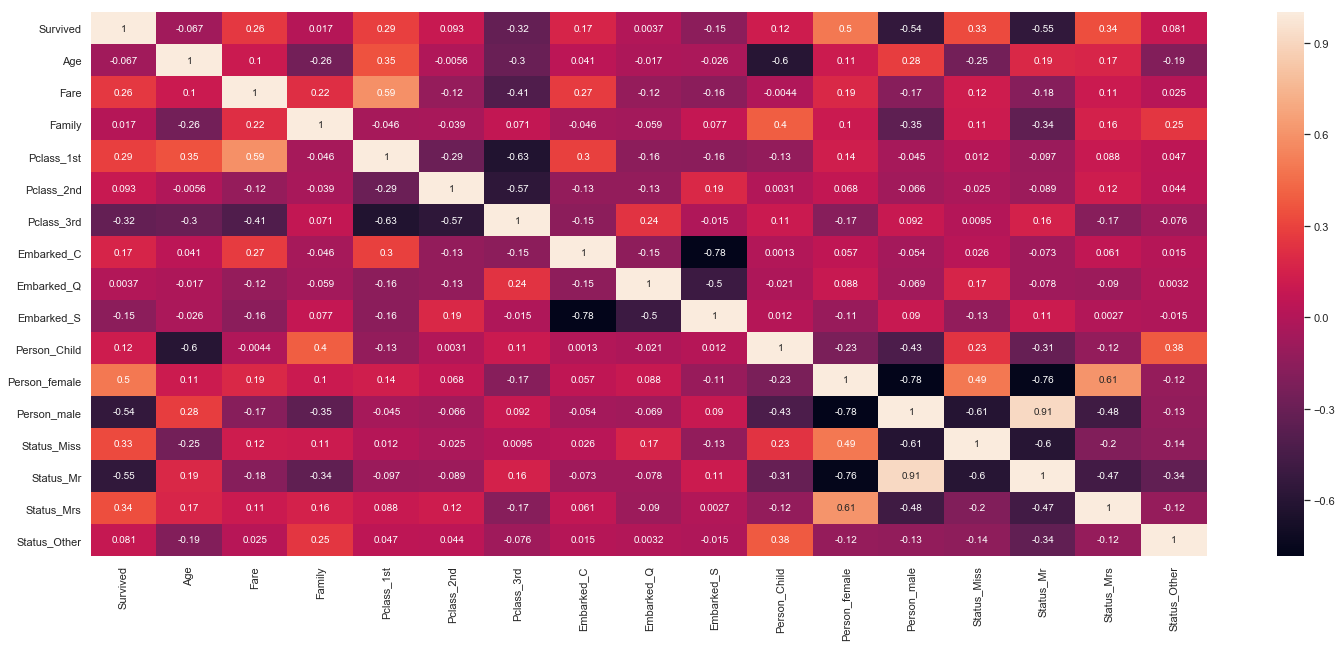

In [44]:

f, a = plt.subplots(figsize = (25,10))

# heatmap showing correlations

sns.heatmap(data=train_data.corr(), annot=True)

# Spliting Data

In [45]:
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Model Training

##### Using Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train,y_train)

C:\Users\Banele Mahlasela\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
log_predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.84      0.72      0.78        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



###### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
#Instantiate our model
decision_tree = DecisionTreeClassifier()

In [56]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
dt_predictions = decision_tree.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        99
           1       0.78      0.66      0.72        80

   micro avg       0.77      0.77      0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.76       179



##### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=600)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
predictions = rfc.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.82      0.70      0.76        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##### Adaptive Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
# Instantiate our model
adaboost = AdaBoostClassifier()

In [68]:
# Fit our model to the training data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [69]:
# Predict on the test data
adaboost_predictions = adaboost.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(classification_report(y_test,adaboost_predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.82      0.74      0.78        80

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.81      0.81       179



##### Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
# Instantiate our model
gb = GradientBoostingClassifier()

In [74]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
gb_predictions = gb.predict(X_test)

In [76]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.88      0.74      0.80        80

   micro avg       0.84      0.84      0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



###### Extreme Gradient Boosting

In [77]:
from xgboost import XGBClassifier

In [78]:
xg = XGBClassifier()    # Instantiate our model

In [79]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [80]:
xg_predictions = xg.predict(X_test)

In [81]:
print(classification_report(y_test,xg_predictions))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        99
           1       0.93      0.70      0.80        80

   micro avg       0.84      0.84      0.84       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.84      0.84       179



In [82]:
(xg.feature_importances_)

array([0.02130752, 0.02454176, 0.0407712 , 0.05816185, 0.01763657,
       0.15501128, 0.0287494 , 0.        , 0.02877245, 0.        ,
       0.00838765, 0.09472729, 0.00840617, 0.48915142, 0.00835404,
       0.01602142], dtype=float32)

##### Bagging Classifier

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
bag = BaggingClassifier()   #Instantiate our model

In [85]:
# Fit our model to the training data
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [86]:
# Predict on the test data
bag_predictions = bag.predict(X_test)

In [87]:
print(classification_report(y_test,bag_predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.69      0.76        80

   micro avg       0.81      0.81      0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



###### Since the gradient boosting method gave us the highest predictive accuracy, we'll use it as our model results

## Use  the XGBoost Model to Test Data

In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
test_data = test_data.set_index("PassengerId")

In [90]:
test_data.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [91]:
#Fill nulls by an average values
def fill_age_testdata(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return round(test_data['Age'][(test_data["Pclass"]==1)].mean()) 
        elif Pclass==2:
            return round(test_data['Age'][(test_data["Pclass"]==2)].mean())
        else:
            return round(test_data['Age'][(test_data["Pclass"]==3)].mean())
    else:
        return Age

In [92]:
test_data['Age']=test_data[['Age','Pclass']].apply(fill_age_testdata,axis =1)


In [93]:
title_mapping  = ['Dona','Master', 'Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Ms', 'Lady', 'Capt', 'Countess', 'Mme', 'Sir', 'Jonkheer', 'Don']

In [94]:
def create_title(name):
    m = re.search(" [A-Za-z]+\.", name)
    if m:
        status = re.sub('\.', '', re.sub(" ", "", m.group(0)))
        return status
    else:
        return "None"

In [95]:
test_data['Status'] = test_data['Name'].apply(create_title)

In [96]:
for title in test_data.Status:
    if title in title_mapping:
        test_data.Status = test_data.Status.replace(title, 'Other')

In [97]:
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] 

In [98]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex

In [ ]:
test_data['Person'] = test_data[['Age','Sex']].apply(male_female_child, axis = 1)


In [100]:
test_data.Pclass = test_data.Pclass.map({1 : '1st',2 : '2nd', 3 : '3rd'})

In [101]:
test_data.drop(['Name','SibSp', 'Parch','Ticket','Cabin', 'Sex'],axis = 1, inplace = True)

In [102]:
test_data.head(10)

,Pclass,Age,Fare,Embarked,Status,Family,Person
PassengerId,,,,,,,
892,3rd,34.5,7.8292,Q,Mr,0,male
893,3rd,47.0,7.0000,S,Mrs,1,female
894,2nd,62.0,9.6875,Q,Mr,0,male
895,3rd,27.0,8.6625,S,Mr,0,male
896,3rd,22.0,12.2875,S,Mrs,2,female
897,3rd,14.0,9.2250,S,Mr,0,Child
898,3rd,30.0,7.6292,Q,Miss,0,female
899,2nd,26.0,29.0000,S,Mr,2,male
900,3rd,18.0,7.2292,C,Mrs,0,female


In [103]:
test_data = pd.get_dummies(test_data)
test_data.head()

,Age,Fare,Family,Pclass_1st,Pclass_2nd,Pclass_3rd,Embarked_C,Embarked_Q,Embarked_S,Status_Miss,Status_Mr,Status_Mrs,Status_Other,Person_Child,Person_female,Person_male
PassengerId,,,,,,,,,,,,,,,,
892,34.5,7.8292,0,0,0,1,0,1,0,0,1,0,0,0,0,1
893,47.0,7.0000,1,0,0,1,0,0,1,0,0,1,0,0,1,0
894,62.0,9.6875,0,0,1,0,0,1,0,0,1,0,0,0,0,1
895,27.0,8.6625,0,0,0,1,0,0,1,0,1,0,0,0,0,1
896,22.0,12.2875,2,0,0,1,0,0,1,0,0,1,0,0,1,0


In [104]:
test_data = test_data[['Age', 'Fare', 'Family', 'Pclass_1st', 'Pclass_2nd', 'Pclass_3rd', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Person_Child', 'Person_female', 'Person_male', 'Status_Miss', 'Status_Mr', 'Status_Mrs', 'Status_Other']]

In [105]:
test_data['Survived'] = xg.predict(test_data)


In [106]:
test_data.reset_index(inplace=True)


In [107]:
final_submit = test_data[['PassengerId','Survived']]
final_submit.to_csv('Submission_titanic.csv', index = False)